# Customer Segment prediction on Wine Data Set using SVM, KNN and Naive Bayes Algorithm.

# Author- Rohan Kulkarni

In [1]:
# Import all Required Libraries all in one
import pyforest
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Reading Dataset
wine=pd.read_csv(r'D:\Imarticus Database\KNN + SVM + Naive Bayes + PCA\Wine.csv')
wine.head()

<IPython.core.display.Javascript object>

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [3]:
wine.shape
# Rows, Columns

(178, 14)

In [4]:
wine.columns
# Name of Columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

In [5]:
wine.isna().sum()
#Check No  Null present

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [6]:
wine['Customer_Segment'].value_counts()
# Target Variable

2    71
1    59
3    48
Name: Customer_Segment, dtype: int64

In [7]:
wine.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

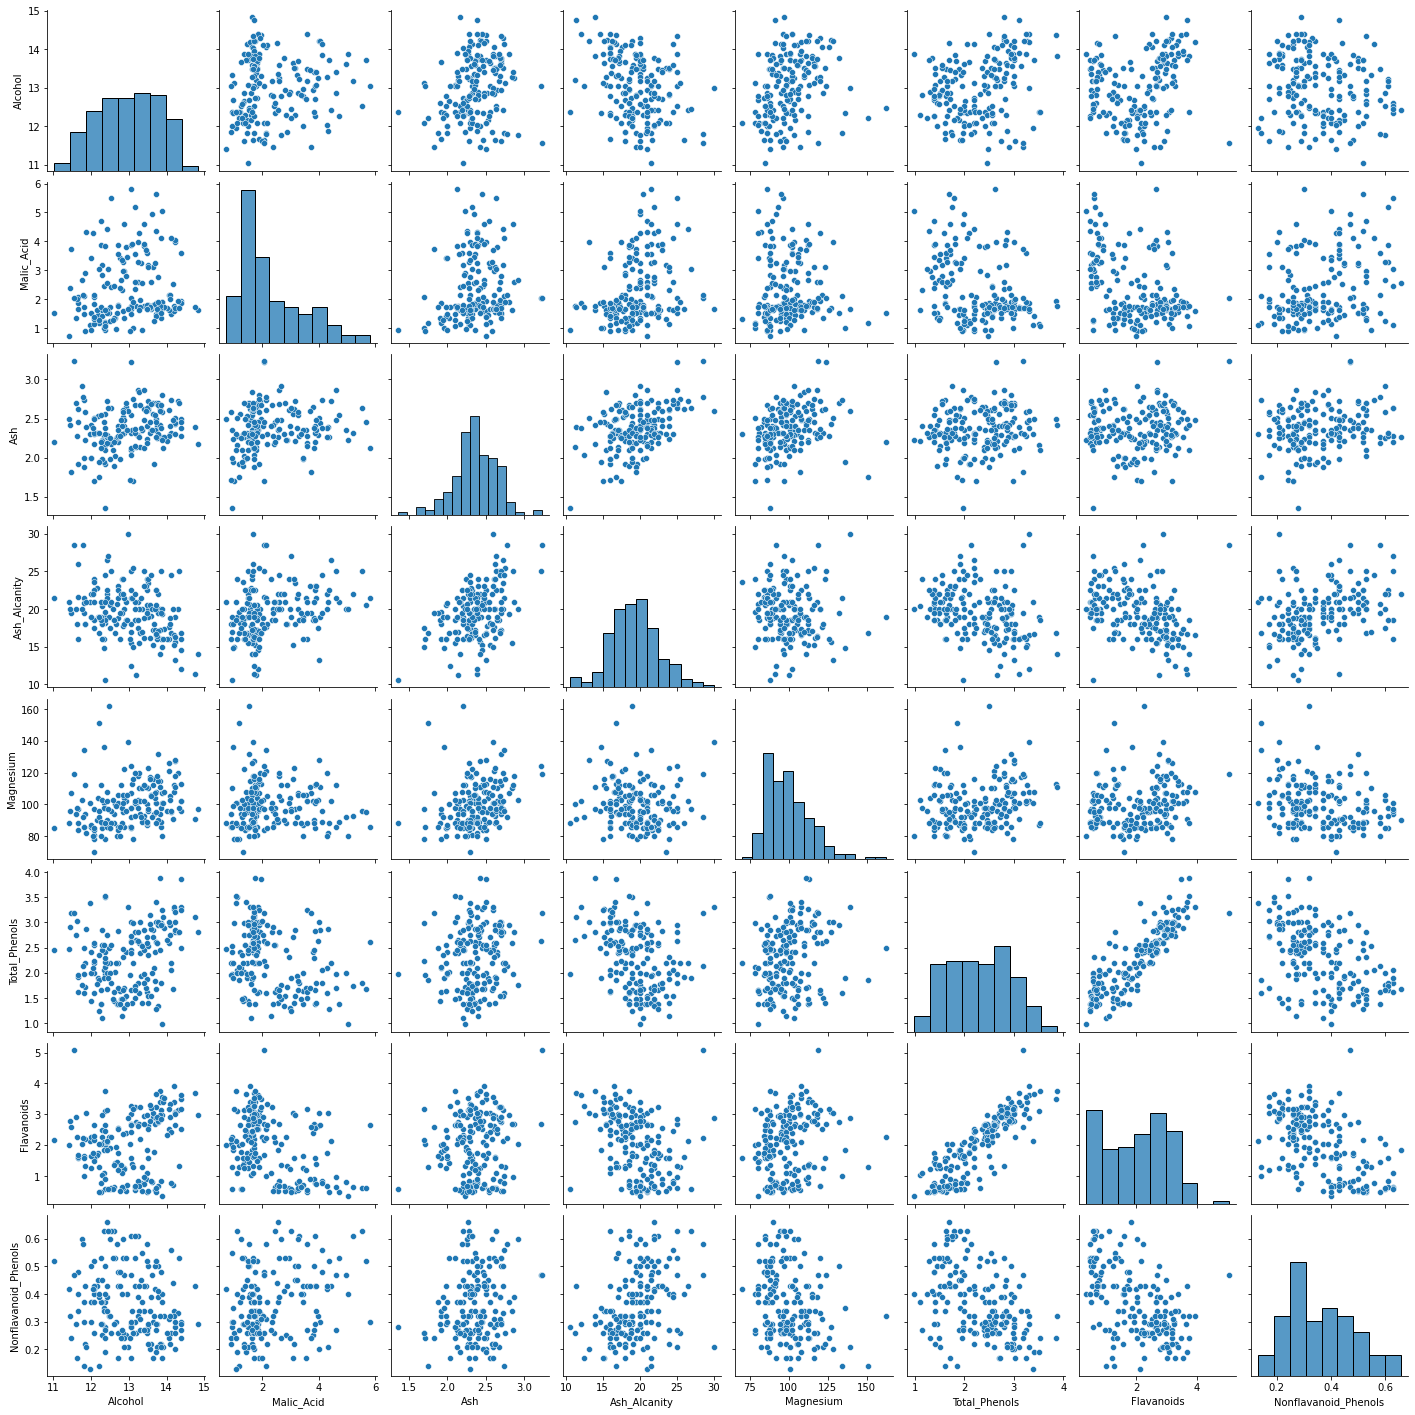

In [8]:
a=wine.iloc[:,:8]
sns.pairplot(a)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

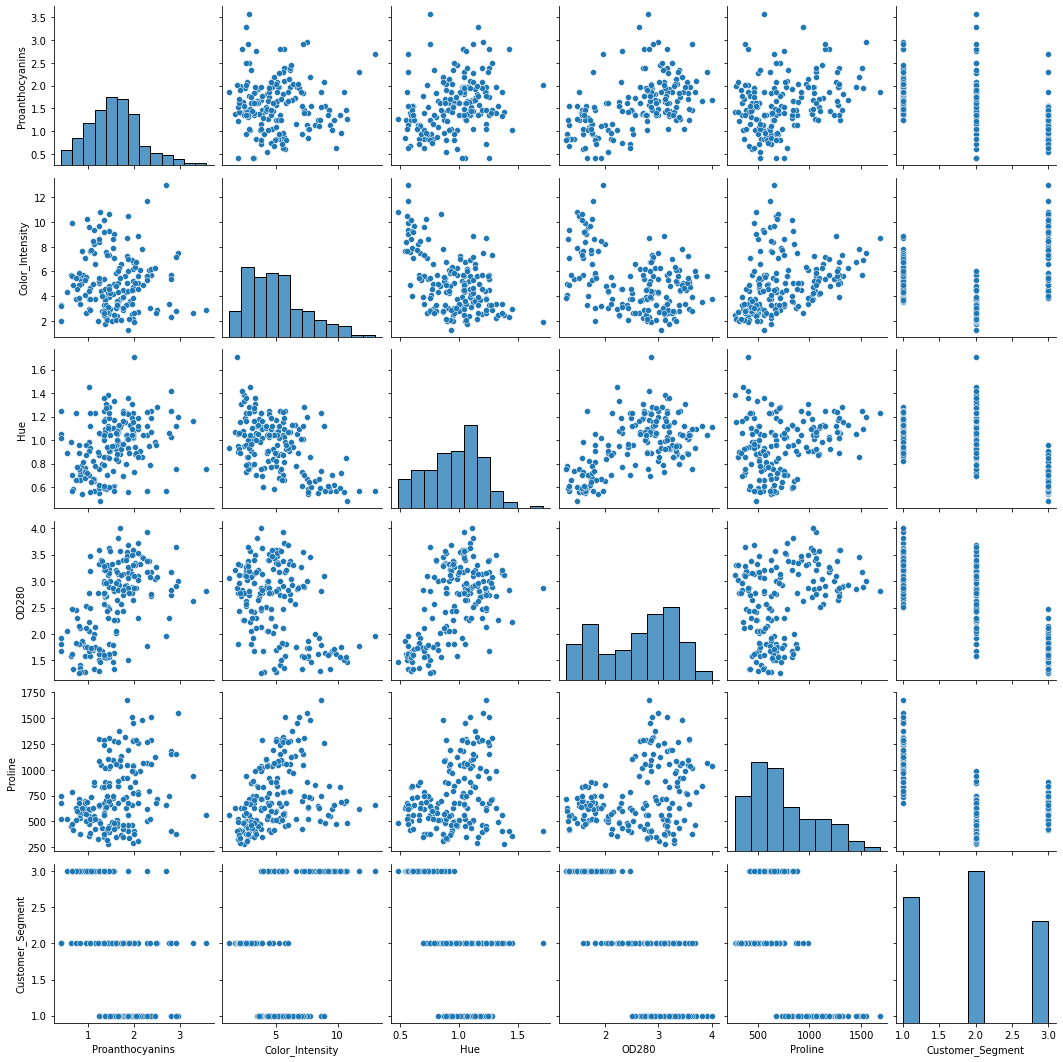

In [9]:
a=wine.iloc[:,8:]
sns.pairplot(a)
plt.show()

## Q.1 Compute and plot those feature which are related to each other?

In [11]:
corr=wine.corr()
corr

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
Ash_Alcanity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
Color_Intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


In [12]:
corr['Customer_Segment'].sort_values(ascending=False)

Customer_Segment        1.000000
Ash_Alcanity            0.517859
Nonflavanoid_Phenols    0.489109
Malic_Acid              0.437776
Color_Intensity         0.265668
Ash                    -0.049643
Magnesium              -0.209179
Alcohol                -0.328222
Proanthocyanins        -0.499130
Hue                    -0.617369
Proline                -0.633717
Total_Phenols          -0.719163
OD280                  -0.788230
Flavanoids             -0.847498
Name: Customer_Segment, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

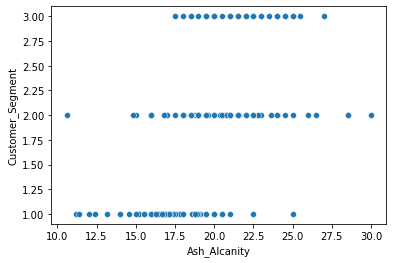

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

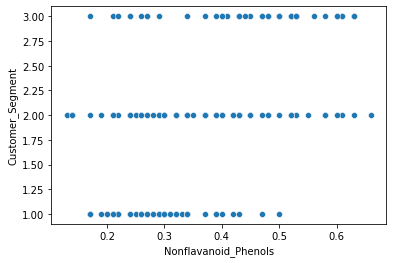

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

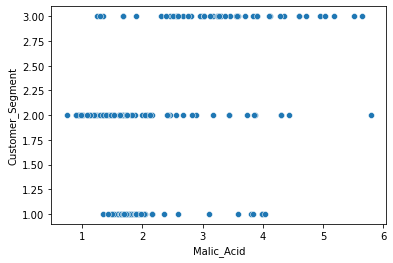

In [13]:
li=['Ash_Alcanity','Nonflavanoid_Phenols','Malic_Acid' ]
for i in li:
    plt.subplots()
    sns.scatterplot(wine[i],wine['Customer_Segment'])
    plt.show()
    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

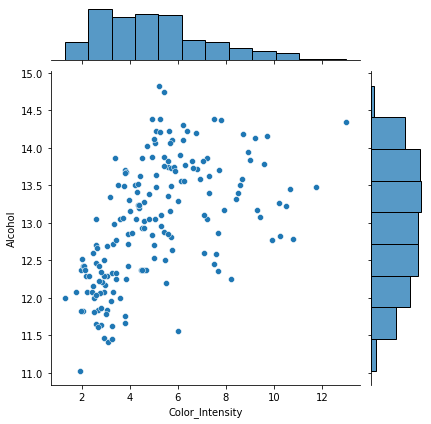

In [14]:
sns.jointplot(wine['Color_Intensity'],wine['Alcohol'])
plt.show()

In [15]:
corr['Customer_Segment'].sort_values()

Flavanoids             -0.847498
OD280                  -0.788230
Total_Phenols          -0.719163
Proline                -0.633717
Hue                    -0.617369
Proanthocyanins        -0.499130
Alcohol                -0.328222
Magnesium              -0.209179
Ash                    -0.049643
Color_Intensity         0.265668
Malic_Acid              0.437776
Nonflavanoid_Phenols    0.489109
Ash_Alcanity            0.517859
Customer_Segment        1.000000
Name: Customer_Segment, dtype: float64

## Model Building

In [16]:
# Train and Test Split
train,test= train_test_split(wine,test_size=0.2)

X_train=train.iloc[:,:-1]
y_train=train.iloc[:,-1]
X_test=test.iloc[:,:-1]
y_test=test.iloc[:,-1]

<IPython.core.display.Javascript object>

In [17]:
(X_train.shape),(y_train.shape),(X_test.shape),(y_test.shape)

((142, 13), (142,), (36, 13), (36,))

In [18]:
from sklearn.metrics import confusion_matrix

## Q.3 Build a KNN classifier considering Optimal number of principal components and value of K and state its score.

In [19]:
from sklearn.neighbors import KNeighborsClassifier

1. Trial with K=5

In [20]:
# Just Trial Performace on K=5 by default
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
# It takes by default 5 as K value
pred=knn.predict(X_test)
kn=knn.score(X_train,y_train)
kn

0.8028169014084507

In [21]:
mat=confusion_matrix(pred,y_test)
mat

array([[12,  1,  2],
       [ 0,  5,  4],
       [ 3,  3,  6]], dtype=int64)

In [23]:
acc=np.round(100*(mat.diagonal().sum())/(mat.sum()))
acc

<IPython.core.display.Javascript object>

64.0

* Here we are checking for values between K= 1 to 50

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

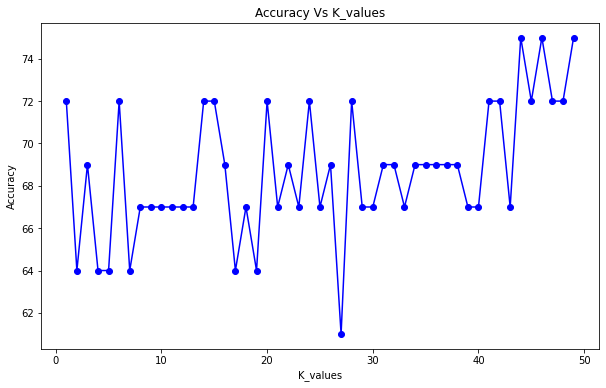

In [24]:
# Here we are checking for values between K= 1 to 50
li_x=list(range(1,50))
result=[]
for i in li_x:
    kn=KNeighborsClassifier(n_neighbors= i)
    kn.fit(X_train,y_train)
    pr=kn.predict(X_test)
    con=confusion_matrix(pr,y_test)
    acc=np.round(100*(con.diagonal().sum())/(con.sum()))
    result.append(acc)

plt.figure(figsize=(10,6))
plt.plot(li_x,result,marker="o",color='blue')
plt.title('Accuracy Vs K_values')
plt.xlabel('K_values')
plt.ylabel('Accuracy')
plt.show()

#### Observations from plot
1. This plot show variation in Accuracy with values of K
2. We want our model to be STABLE i.e. Consistent Accuracy so we wil go for K=20
3. So that slight variation in model can also be accepted

In [25]:
knn_org=KNeighborsClassifier(n_neighbors=20)
knn_org.fit(X_train,y_train)
pred=knn.predict(X_test)
con=confusion_matrix(pred,y_test)
con

array([[12,  1,  2],
       [ 0,  5,  4],
       [ 3,  3,  6]], dtype=int64)

In [26]:
Accuracy= (con.diagonal().sum())/(con.sum())
print('Accuracy of KNN Model is:',np.round((Accuracy)*100,3),"%")

<IPython.core.display.Javascript object>

Accuracy of KNN Model is: 63.889 %


In [27]:
knn_score=knn.score(X_train,y_train)
print('Score of KNN Model is :',np.round((knn_score),2))

<IPython.core.display.Javascript object>

Score of KNN Model is : 0.8


### Q.4 Build a SVM Classifier and tune the hyperparameters to get the optimum model.

### Support Vector Machines

In [28]:
from sklearn import svm
model_svm=svm.SVC()
model_svm.fit(X_train,y_train)

SVC()

In [29]:
pred=model_svm.predict(X_test)
pred

array([1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [30]:
con=confusion_matrix(pred,y_test)
con

array([[13,  0,  1],
       [ 2,  9, 11],
       [ 0,  0,  0]], dtype=int64)

In [31]:
Accuracy_svm= (con.diagonal().sum())/(con.sum())
print('Accuracy of SVM Model is:',np.round((Accuracy_svm)*100,2),"%")

<IPython.core.display.Javascript object>

Accuracy of SVM Model is: 61.11 %


In [32]:
svm_score=model_svm.score(X_train,y_train)
print('Score of SVM Model is :',np.round((svm_score),2))

<IPython.core.display.Javascript object>

Score of SVM Model is : 0.68


In [33]:
from sklearn.svm import SVC
search_dict={"kernel":('linear', 'poly', 'rbf', 'sigmoid')}
svc=SVC(kernel='linear')
grid_svc = GridSearchCV(svc , param_grid =search_dict )
grid_svc

<IPython.core.display.Javascript object>

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'kernel': ('linear', 'poly', 'rbf', 'sigmoid')})

In [34]:
grid_svc.fit(X_train,y_train)

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'kernel': ('linear', 'poly', 'rbf', 'sigmoid')})

In [35]:
grid_svc.best_params_
# Now we know that Linear gives best Results so use it

{'kernel': 'linear'}

In [36]:
model_svm=svm.SVC(kernel='linear')
model_svm.fit(X_train,y_train)
pred=model_svm.predict(X_test)
pred

array([1, 1, 3, 1, 3, 3, 1, 3, 1, 1, 1, 1, 2, 3, 3, 2, 1, 1, 3, 1, 1, 3,
       2, 3, 2, 3, 1, 2, 1, 2, 3, 2, 3, 2, 2, 1], dtype=int64)

In [37]:
con_svm_after_grid=confusion_matrix(pred,y_test)
con_svm_after_grid

array([[15,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 12]], dtype=int64)

In [38]:
Accuracy_after_grid= (con_svm_after_grid.diagonal().sum())/(con_svm_after_grid.sum())
print('Accuracy of SVM_After Grid Model is:',np.round((Accuracy_after_grid)*100,2),"%")

<IPython.core.display.Javascript object>

Accuracy of SVM_After Grid Model is: 100.0 %


In [39]:
svm_score_=model_svm.score(X_train,y_train)
print('Score of SVM_After Grid Model is :',((svm_score_)))

Score of SVM_After Grid Model is : 0.9859154929577465


## Q.5 Build a Naive Bayes Classifier and comment about its accuracy.

In [40]:
from sklearn.naive_bayes import MultinomialNB

In [41]:
nav=MultinomialNB()
nav.fit(X_train,y_train)

MultinomialNB()

In [42]:
pred_nav=nav.predict(X_test)

con_mat=confusion_matrix(pred_nav,y_test)
# This is Direct method.
print("This is Confusion Matrix",)
print(con_mat)

This is Confusion Matrix
[[13  0  0]
 [ 1  9  1]
 [ 1  0 11]]


In [43]:
Accuracy_Naive_Bayes= (con_mat.diagonal().sum())/(con_mat.sum())
print('Accuracy of Naive Bays Model is:',np.round((Accuracy_Naive_Bayes)*100,2),"%")

<IPython.core.display.Javascript object>

Accuracy of Naive Bays Model is: 91.67 %


In [44]:
nav_score=nav.score(X_train,y_train)
print('Score of Naive Bays Model is :',np.round((nav_score),2))

<IPython.core.display.Javascript object>

Score of Naive Bays Model is : 0.89


In [45]:
Accuracy=np.round(Accuracy,4)*100
Accuracy_svm=np.round(Accuracy_svm,4)*100
Accuracy_after_grid=np.round(Accuracy_after_grid,4)*100
Accuracy_Naive_Bayes=np.round(Accuracy_Naive_Bayes,4)*100



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Q.6 Compare all of the models and justify your choice about the optimum model.

In [50]:
pd.DataFrame({'Accuracy':[acc,Accuracy,Accuracy_svm,Accuracy_after_grid,Accuracy_Naive_Bayes],
              'Score':['0.8',knn_score,svm_score,svm_score_,nav_score]},
             index=['KNN_K_5','KNN_K_Optimal','SVM_Without_Grid','SVM_GRID','Naive_Bayes'])

<IPython.core.display.Javascript object>

,Accuracy,Score
KNN_K_5,75.00,0.8
KNN_K_Optimal,63.89,0.802817
SVM_Without_Grid,61.11,0.683099
SVM_GRID,100.00,0.985915
Naive_Bayes,91.67,0.887324
